In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
#from keras.optimizers import Adam, Adadelta
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import os
import math

from sklearn.utils import shuffle
from matplotlib import gridspec


import tensorflow as tf
from tensorflow.keras.models import Model, model_from_json
from tensorflow.keras import Sequential
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Lambda, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.models import Model
    
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from matplotlib import gridspec
from matplotlib import patches

from sklearn.utils import shuffle


from scipy.stats import poisson
import random
from scipy.interpolate import interp1d
from scipy.stats import norm


import scipy.stats as st

plt.rcParams["font.family"] = "serif"

base_dir = '../Data'

In [2]:
!pip install xgboost

import xgboost
from xgboost import XGBRegressor, XGBClassifier

You should consider upgrading via the '/home/andres/anaconda3/bin/python -m pip install --upgrade pip' command.


### Gaussians

In [3]:
##############
# PARAMETERS #
##############

# number of events (N background events, and another N signal events)
N = 1000000

# number of ensembles
n_ensembles = 2000

# number of expected background events per ensemble
B_expected = 50000

# ratio S_expected/B_expected (signal ratio)
SB_ratio = [0.01]

# we will test several gaussian means (separation between signal and back distributions)
# back: -mean,  sig: +mean
means = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]




# SOME USEFUL DERIVATED PARAMETERS:

# S_expected:
S_expected = [ int(SB_ratio[iii]*B_expected) for iii in range(len(SB_ratio)) ]

# S/\sqrt{B}
SsqrtB = [ S_expected[iii]/(B_expected)**0.5 for iii in range(len(SB_ratio)) ]


 ##################################### 
 DATA: Gaussians with mean +- 0.1
 ##################################### 



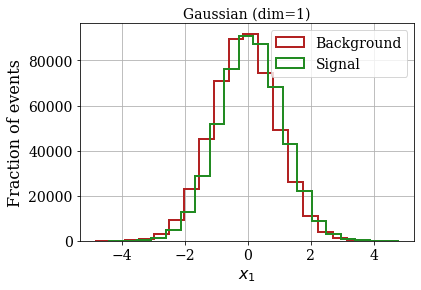

XGBOOST: 



/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.69214	validation_1-logloss:0.69219
[1]	validation_0-logloss:0.69139	validation_1-logloss:0.69147
[2]	validation_0-logloss:0.69072	validation_1-logloss:0.69084
[3]	validation_0-logloss:0.69023	validation_1-logloss:0.69038
[4]	validation_0-logloss:0.68982	validation_1-logloss:0.69001
[5]	validation_0-logloss:0.68947	validation_1-logloss:0.68969
[6]	validation_0-logloss:0.68914	validation_1-logloss:0.68939
[7]	validation_0-logloss:0.68885	validation_1-logloss:0.68912
[8]	validation_0-logloss:0.68870	validation_1-logloss:0.68900
[9]	validation_0-logloss:0.68857	validation_1-logloss:0.68890
[10]	validation_0-logloss:0.68836	validation_1-logloss:0.68871
[11]	validation_0-logloss:0.68834	validation_1-logloss:0.68871
[12]	validation_0-logloss:0.68818	validation_1-logloss:0.68857
[13]	validation_0-logloss:0.68821	validation_1-logloss:0.68863
[14]	validation_0-logloss:0.68806	validation_1-logloss:0.68850
[15]	validation_0-logloss:0.68807	validation_1-logloss:0.68853
[1

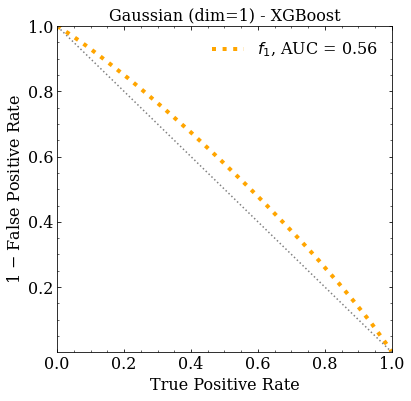


 Classification score:


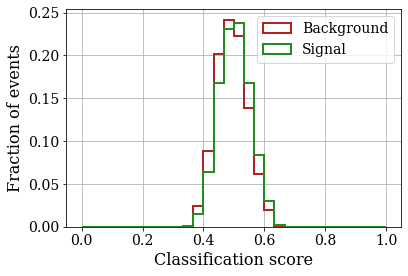


 Classification score interpolation:


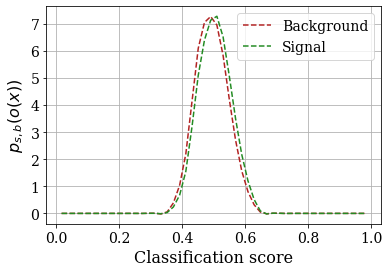


-----------------------------------
 FIRST METHOD: COUNTING, BINNED
-----------------------------------
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
Z_bins :  2.271099875035788

-------------------------------------
 SECOND METHOD: OUR METHOD, GAUSSIANS
-------------------------------------
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  2000

 If  10100  =  599    then the proposed range has to be extended
n_ensembles (actual):  1342

 This may take long... 



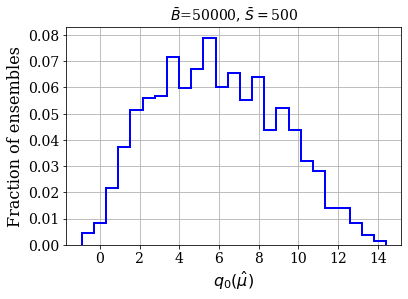

muhat mean:  1.0
median q_muhat:  5.73167186963758
Z_gaussian:  2.394091032028143

-------------------------------------
 THIRD METHOD: OUR METHOD, GAUSSIANS
-------------------------------------
B_expected:  50000
S_expected:  500
S/$\sqrt{B}$:  2.23606797749979
n_ensembles (initial):  2000

 If  10100  =  599    then the proposed range has to be extended
n_ensembles (actual):  1342

 This may take long... 



In [ ]:
store_AUC = []

store_Z_bins = []

store_muhat_mean_gaussian = []
store_Z_gaussian = []

store_muhat_mean_XG = []
store_Z_XG = []

for k in range(len(means)):
    
    print('\n ##################################### ')
    print(' DATA: Gaussians with mean +-', means[k])
    print(' ##################################### \n')
    

    #######################
    # generate the events #
    #######################

    background_X_1 = np.random.normal(-means[k],1,N)
    signal_X_1 = np.random.normal(means[k],1,N)

    dim1 = np.concatenate((background_X_1,signal_X_1))

    # labels
    background_Y = np.zeros(N)
    signal_Y = np.ones(N)

    # DATA in a dataframe (features + labels)
    df = pd.DataFrame()
    df['dim1'] = dim1.reshape(-1)
    df['Y'] = np.concatenate((background_Y.astype('int'),signal_Y.astype('int')))

    X_gauss = df[['dim1']].values 
    Y_gauss = df[['Y']].values

    X_gauss_train, X_gauss_val, Y_gauss_train, Y_gauss_val = train_test_split(X_gauss, Y_gauss, test_size=0.5)
    
    
    
    
    # PLOT to visualize the data
    X_gauss_val_SM = []
    X_gauss_val_NP = []

    for i in range(len(Y_gauss_val)):
        if Y_gauss_val[i] ==0:
            X_gauss_val_SM.append(X_gauss_val[i].tolist())
        else:
            X_gauss_val_NP.append(X_gauss_val[i].tolist())    

            
    X_gauss_val_SM = np.array(X_gauss_val_SM)
    X_gauss_val_NP = np.array(X_gauss_val_NP)


    weights = np.ones_like(X_gauss_val_SM[:,0])/float(len(X_gauss_val_SM[:,0]))
    plt.hist(X_gauss_val_SM[:,0], 20, histtype='step', color='firebrick', linewidth=2, label='Background')

    weights = np.ones_like(X_gauss_val_NP[:,0])/float(len(X_gauss_val_NP[:,0]))
    plt.hist(X_gauss_val_NP[:,0], 20, histtype='step', color='forestgreen', linewidth=2, label='Signal')

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$x_1$",fontsize=16)
    plt.ylabel("Fraction of events",fontsize=16)
    plt.grid()
    plt.legend(fontsize=14)
    plt.title(r"Gaussian (dim=1)",fontsize=14)
    plt.show()  

    
    
    
    #######################
    # CLASSIFIER: XGBoost #
    #######################
    
    print('XGBOOST: \n')
    
    classifier = XGBClassifier(
        n_estimators=500,
        learning_rate=0.1,
        reg_lambda=0.0,reg_alpha=0.0,
        gamma=0.0,objective='binary:logistic',
        max_depth=5)

    # FIT
    classifier.fit(X_gauss_train,Y_gauss_train,eval_set=[(X_gauss_train, Y_gauss_train), (X_gauss_val, Y_gauss_val)],
            eval_metric='logloss',early_stopping_rounds=50,#early stopping
            verbose=True)

    
    # PREDICTIONS
    y_pred_xg = classifier.predict_proba(X_gauss_val).T[1]


    # ROC
    fpr_gauss_xg, tpr_gauss_xg, _ = roc_curve(Y_gauss_val, y_pred_xg)
    roc_auc_xg = auc(fpr_gauss_xg, tpr_gauss_xg)

    store_AUC.append(roc_auc_xg)
    

    # PLOT THE ROC WITH AUC
    fig = plt.figure(figsize=(6, 6))
    gs = gridspec.GridSpec(1, 1) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax0.minorticks_on()


    plt.plot(tpr_gauss_xg,1-fpr_gauss_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
    plt.plot([1,0],[0,1],ls=":",color="grey")
    plt.xlabel("True Positive Rate",fontsize=16)
    plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
    plt.legend()
    plt.title(r"Gaussian (dim=1) - XGBoost",fontsize=16)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.yticks([0.2,0.4,0.6,0.8,1.])
    plt.legend(frameon=False,fontsize=16)
    plt.show()
    
    
    
    
    ########################
    # CLASSIFICATION SCORE #
    ########################
    
    # Outputs for validation data set

    pred_XG_SM = []
    pred_XG_NP = []

    for i in range(len(Y_gauss_val)):
        if Y_gauss_val[i] == 0:
            pred_XG_SM.append(y_pred_xg[i])
        else:
            pred_XG_NP.append(y_pred_xg[i])

    print('\n Classification score:')

    weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
    nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 30, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

    weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
    nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 30, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("Classification score",fontsize=16)
    plt.ylabel("Fraction of events",fontsize=16)
    plt.grid()
    plt.legend(fontsize=14)
    plt.show()
    
    
    # INTERPOLATE TO USE AS p_s(x) and p_b(x) ESTIMATES
    
    # center of each bin
    binsSM_mid = []
    binsNP_mid = []
    
    for i in range(len(binsSM)-1):
        binsSM_mid.append( ((binsSM[i+1]-binsSM[i])/2)+binsSM[i] )

    for i in range(len(binsNP)-1):
        binsNP_mid.append( ((binsNP[i+1]-binsNP[i])/2)+binsNP[i] )

        
    # get the width of each bin
    bin_width_SM = binsSM[1] - binsSM[0]
    bin_width_NP = binsNP[1] - binsNP[0]
    
    

    # Interpolation, cubic
    fcubic_XG_SM = interp1d(binsSM_mid, nSM, kind='cubic')
    fcubic_XG_NP = interp1d(binsNP_mid, nNP, kind='cubic')

    
    # Normalize

    def fcubic_XG_SM_norm(x):
        return fcubic_XG_SM(x)/bin_width_SM

    def fcubic_XG_NP_norm(x):
        return fcubic_XG_NP(x)/bin_width_NP
    
    
    print('\n Classification score interpolation:')
    # x to plot
    xnew_XG_SM = np.linspace(min(binsSM_mid), max(binsSM_mid), num=50, endpoint=True)
    xnew_XG_NP = np.linspace(min(binsNP_mid), max(binsNP_mid), num=50, endpoint=True)
    
    plt.plot(xnew_XG_SM, fcubic_XG_SM_norm(xnew_XG_SM), '--', color='firebrick', label='Background')
    plt.plot(xnew_XG_NP, fcubic_XG_NP_norm(xnew_XG_NP), '--', color='forestgreen', label='Signal')

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("Classification score",fontsize=16)
    plt.ylabel("$p_{s,b}(o(x))$",fontsize=16)
    plt.grid()
    plt.legend(fontsize=14)
    plt.show()
    
    
    
    
    
    ###############################################################
    # FIRST METHOD: BINNED POISSON LOG-LIKELIHOOD, ASIMOV DATASET #
    ###############################################################
    
    print('\n-----------------------------------')
    print(' FIRST METHOD: COUNTING, BINNED')
    print('-----------------------------------')
    
    
    for iii in range(len(SB_ratio)):
        
        print('B_expected: ', B_expected)
        print('S_expected: ', S_expected[iii])
        print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
        
        # Les't use an integer number of possible ensembles
        N_ensembles_back = int(N / B_expected)
        N_events_back = N_ensembles_back * B_expected
        
        N_ensembles_sig = int(N / S_expected[iii])
        N_events_sig = N_ensembles_sig * S_expected[iii]
        
        
        #Let's find out the expected number of B and S events in each bin:
        
        # bin the parameter space of all background events
        hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=(10), range = [[-3,3]])
        # now divide by the number of possible ensembles
        back_prom = hist_back.T.ravel()/N_ensembles_back
    
        # same for signal
        hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=(10), range = [[-3,3]])
        sig_prom = hist_sig.T.ravel()/N_ensembles_sig
        
        
        
        # If a bins has no expected background events replace that zero for the minimum B_bin=/=0
        
        # find the minimum
        back_prom_noceros = []
        for i in range(len(back_prom)):
            if back_prom[i]!=0:
                back_prom_noceros.append(back_prom[i])

        min_back = min(back_prom_noceros)
        
        # replace the zeros
        for i in range(len(back_prom)):
            if back_prom[i]==0:
                back_prom[i] = min_back
                
        # then the signif Z^binned-Asimov:
        Z_bins = ( 2* sum( ( (sig_prom + back_prom) * np.log( 1 + (sig_prom/back_prom) ) ) - sig_prom ) )**0.5
    
        store_Z_bins.append(Z_bins)
        
        print('Z_bins : ', Z_bins)

        
        
    #####################################################################
    # SECOND METHOD: OUR METHOD USING THE REAL p_{s,b}(x) DISTRIBUTIONS # i.e NO ML
    #####################################################################
    
    print('\n-------------------------------------')
    print(' SECOND METHOD: OUR METHOD, GAUSSIANS')
    print('-------------------------------------')
    
    
    for iii in range(len(SB_ratio)):
        
        print('B_expected: ', B_expected)
        print('S_expected: ', S_expected[iii])
        print('S/$\sqrt{B}$: ', SsqrtB[iii])
        print('n_ensembles (initial): ', n_ensembles)
        
        
        # to construct ensembles B and S events are taken from Poisson distributions
        mu = S_expected[iii] + B_expected
        
        
        # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution
        
        # around the mean its populated so let's try (proposed range to be checked)
        list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
        to_check = len(list_events_per_ensembles)
        
        # I want at least one ensemble populated
        list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]
        
        
        
        # Remove from the list the elements without at least 1 ensemble possible
        for i in range(len(list_events_per_ensembles)):
            if list_nums_ensembles[i] > 1:
                list_events_per_ensembles = list_events_per_ensembles[i:]
                list_nums_ensembles = list_nums_ensembles[i:]
                break


        for i in range(len(list_events_per_ensembles)):
            if list_nums_ensembles[i] < 1:
                list_events_per_ensembles = list_events_per_ensembles[:i]
                list_nums_ensembles = list_nums_ensembles[:i]
                break
                
        print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

        print('n_ensembles (actual): ', sum(list_nums_ensembles))
        
        
        
        # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

        p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

        list_S_per_ensembles = []
        list_B_per_ensembles = []

        for jj in range(len(list_events_per_ensembles)):
            list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
            list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

        ######
        # NOW I HAVE 4 LISTS:
        # list_events_per_ensembles     list with the number of events per ensemble (its a range)
        # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
        # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
        # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
        ######
        
        

        print('\n This may take long... \n')


        # NOW LETS APPLY THE METHOD
        
        muhat_selected_list = []
        q_muhat = []

        for bb in range(len(list_nums_ensembles)):

            for kk in range(list_nums_ensembles[bb]):

                # SIGNAL events in an ensemble
                NP_shuf = shuffle(X_gauss_val_NP)[:list_S_per_ensembles[bb]]

                prob_NP_given_B = [] # p_b(S_ensemble)
                prob_NP_given_S = [] # p_s(S_ensemble)

                for ll in range(len(NP_shuf)):
                    prob_NP_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]-means[k])**2 ) ) )
                    prob_NP_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (NP_shuf[ll,0]+means[k])**2 ) ) )


                # BACKGROUND events in an ensemble
                SM_shuf = shuffle(X_gauss_val_SM)[:list_B_per_ensembles[bb]]

                prob_SM_given_B = [] # p_b(B_ensemble)
                prob_SM_given_S = [] # p_s(B_ensemble)

                for ll in range(len(SM_shuf)):
                    prob_SM_given_S.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]-means[k])**2 ) ) )
                    prob_SM_given_B.append( (1./(2*math.pi)**0.5) * math.exp(-0.5*( (SM_shuf[ll,0]+means[k])**2 ) ) )


                # p_b(x_ensemble) =    concatenate: p_b(B_ensemble) and p_b(S_ensemble)
                prob_x_given_B = prob_SM_given_B + prob_NP_given_B

                # p_s(x_ensemble) =    concatenate: p_s(B_ensemble) and p_s(S_ensemble)
                prob_x_given_S = prob_SM_given_S + prob_NP_given_S




                # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
                # WE NEED TO ESTIMATE mu_hat for this particular ensemble
                # we are going to obtain a mu_hat with a grid of values for this particular ensemble



#                 mu_hat_condition_equal_1 = []

#                 # grid, mu_hat is around 1
#                 muhat_test = np.arange(0.5, 2, 0.1).tolist()

#                 B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

#                 for vv in range(len(muhat_test)):

#                     mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



                muhat_selected = 1

#                 # from the grid, select the mu_hat such that the condition is equal to 1
#                 if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
#                     for ll in range(len(mu_hat_condition_equal_1)):
#                         if mu_hat_condition_equal_1[ll] -1 > 0:
#                             muhat_selected = muhat_test[ll]
#                             break


#                 if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
#                     for ll in range(len(mu_hat_condition_equal_1)):
#                         if mu_hat_condition_equal_1[ll] -1 < 0:
#                             muhat_selected = muhat_test[ll]
#                             break

                            
                muhat_selected_list.append(muhat_selected)



                # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
                # and append it (we need the median over lots of ensembles)
                q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )



        # Histogram of q_muhats

        weights = np.ones_like(q_muhat)/float(len(q_muhat))
        nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
        #plt.xlim(0,1)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
        plt.ylabel("Fraction of ensembles",fontsize=16)
        plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
        plt.grid()
        #plt.legend(fontsize=14)
        plt.show()

        
        # Finally calculate muhat_mean and Z_gaussian
        muhat_mean = np.mean(muhat_selected_list)
        store_muhat_mean_gaussian.append(muhat_mean)

        q_muhat_median = np.median(q_muhat)
        
        Z_gaussian = abs(q_muhat_median)**0.5
        store_Z_gaussian.append(Z_gaussian)
        
        print('muhat mean: ', muhat_mean)
        print('median q_muhat: ', q_muhat_median)
        print('Z_gaussian: ', Z_gaussian)


        
        
        
    
    ###############################################################################
    # THIRD METHOD: OUR METHOD USING XGBOOST TO ESTIMATE p_{s,b}(x) DISTRIBUTIONS #
    ###############################################################################
    
    print('\n-------------------------------------')
    print(' THIRD METHOD: OUR METHOD, GAUSSIANS')
    print('-------------------------------------')
    
    # the first part is the same as before, but we repeat it, it is not the expensive part
    for iii in range(len(SB_ratio)):
        
        print('B_expected: ', B_expected)
        print('S_expected: ', S_expected[iii])
        print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
        print('n_ensembles (initial): ', n_ensembles)
        
        
        # to construct ensembles B and S events are taken from Poisson distributions
        mu = S_expected[iii] + B_expected
        
        
        # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution
        
        # around the mean its populated so let's try (proposed range to be checked)
        list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
        to_check = len(list_events_per_ensembles)
        
        # I want at least one ensemble populated
        list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]
        
        
        
        # Remove from the list the elements without at least 1 ensemble possible
        for i in range(len(list_events_per_ensembles)):
            if list_nums_ensembles[i] > 1:
                list_events_per_ensembles = list_events_per_ensembles[i:]
                list_nums_ensembles = list_nums_ensembles[i:]
                break


        for i in range(len(list_events_per_ensembles)):
            if list_nums_ensembles[i] < 1:
                list_events_per_ensembles = list_events_per_ensembles[:i]
                list_nums_ensembles = list_nums_ensembles[:i]
                break
                
        print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

        print('n_ensembles (actual): ', sum(list_nums_ensembles))
        
        
        
        # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

        p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

        list_S_per_ensembles = []
        list_B_per_ensembles = []

        for jj in range(len(list_events_per_ensembles)):
            list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
            list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

        ######
        # NOW I HAVE 4 LISTS:
        # list_events_per_ensembles     list with the number of events per ensemble (its a range)
        # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
        # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
        # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
        ######
        
        

        print('\n This may take long... \n')


        # NOW LETS APPLY THE METHOD
        
        muhat_selected_list = []
        q_muhat = []

        for bb in range(len(list_nums_ensembles)):

            for kk in range(list_nums_ensembles[bb]):

                # SIGNAL: classification score for the SIGNAL events in an ensemble
                pred_NP_shuf = np.array(shuffle(pred_XG_NP))[:list_S_per_ensembles[bb]]

                # BACKGROUND: classification score for the BACKGROUND events in an ensemble
                pred_SM_shuf = np.array(shuffle(pred_XG_SM))[:list_B_per_ensembles[bb]]


                # To avoid issues
                for kkk in range(len(pred_NP_shuf)):
                    if pred_NP_shuf[kkk] < min(binsNP_mid):
                        pred_NP_shuf[kkk] = min(binsNP_mid)
                    if pred_NP_shuf[kkk] > max(binsNP_mid):
                        pred_NP_shuf[kkk] = max(binsNP_mid)        

                for kkk in range(len(pred_SM_shuf)):
                    if pred_SM_shuf[kkk] < min(binsSM_mid):
                        pred_SM_shuf[kkk] = min(binsSM_mid)
                    if pred_SM_shuf[kkk] > max(binsSM_mid):
                        pred_SM_shuf[kkk] = max(binsSM_mid)


                # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
                prob_x_given_B = np.ndarray.tolist( fcubic_XG_SM_norm( pred_SM_shuf ) ) + np.ndarray.tolist( fcubic_XG_SM_norm( pred_NP_shuf ) )

                # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
                prob_x_given_S = np.ndarray.tolist( fcubic_XG_NP_norm( pred_SM_shuf ) ) + np.ndarray.tolist( fcubic_XG_NP_norm( pred_NP_shuf ) )


                
                
                
                
                
                


                # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
                # WE NEED TO ESTIMATE mu_hat for this particular ensemble
                # we are going to obtain a mu_hat with a grid of values for this particular ensemble



#                 mu_hat_condition_equal_1 = []

#                 # grid, mu_hat is around 1
#                 muhat_test = np.arange(0.5, 2, 0.1).tolist()

#                 B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

#                 for vv in range(len(muhat_test)):

#                     mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



                muhat_selected = 1

#                 # from the grid, select the mu_hat such that the condition is equal to 1
#                 if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
#                     for ll in range(len(mu_hat_condition_equal_1)):
#                         if mu_hat_condition_equal_1[ll] -1 > 0:
#                             muhat_selected = muhat_test[ll]
#                             break


#                 if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
#                     for ll in range(len(mu_hat_condition_equal_1)):
#                         if mu_hat_condition_equal_1[ll] -1 < 0:
#                             muhat_selected = muhat_test[ll]
#                             break


                muhat_selected_list.append(muhat_selected)



                # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
                # and append it (we need the median over lots of ensembles)
                q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )



        # Histogram of q_muhats

        weights = np.ones_like(q_muhat)/float(len(q_muhat))
        nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
        #plt.xlim(0,1)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
        plt.ylabel("Fraction of ensembles",fontsize=16)
        plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
        plt.grid()
        #plt.legend(fontsize=14)
        plt.show()

        
        # Finally calculate muhat_mean and Z_gaussian
        muhat_mean = np.mean(muhat_selected_list)
        store_muhat_mean_XG.append(muhat_mean)

        q_muhat_median = np.median(q_muhat)
        
        Z_XG = abs(q_muhat_median)**0.5
        store_Z_XG.append(Z_XG)
        
        print('muhat mean: ', muhat_mean)
        print('median q_muhat: ', q_muhat_median)
        print('Z_XG: ', Z_XG)



In [ ]:
print(store_AUC)

print(store_Z_bins)

print(store_muhat_mean_gaussian)
print(store_Z_gaussian)

print(store_muhat_mean_XG)
print(store_Z_XG)

In [ ]:
store_AUC = 

store_Z_bins = 

store_muhat_mean_gaussian = 
store_Z_gaussian = 

store_muhat_mean_XG = 
store_Z_XG = 

In [ ]:
#########
# PLOTS #
#########

SsqrtBplot = []

for i in range(len(means)):
    SsqrtBplot.append( (B_expected*SB_ratio[0]) / ( B_expected )**0.5 )
    

    
    
plt.figure()
lw = 2

plt.plot(means, store_AUC, '-', color='green', lw=lw, label=r'$f_{XGBoost\rightarrow ensemble}$')

plt.xlim([0.05, 1.05])
plt.ylim([0.45, 1.05])
#plt.xscale('log')
#plt.axes().set_aspect(0.7)
plt.xlabel('$\mu$', fontsize=15)
plt.ylabel('AUC', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim=1}$', fontsize=14)
#plt.legend(loc="upper left", fontsize=11)
plt.savefig('images/' + '1gaussian-AUCvsmu-fixedmuhat.pdf', format="pdf", bbox_inches="tight")
plt.show()





plt.figure()
lw = 2

plt.plot(means, store_muhat_mean_XG, '-', color='red', lw=3, label='XGBoost')
plt.plot(means, store_muhat_mean_gaussian, '-', color='green', lw=lw, label='Gaussian')

plt.xlim([0.05, 1.05])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
#plt.axes().set_aspect(0.7)
plt.xlabel('$\mu$', fontsize=15)
plt.ylabel(r'$\hat{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim=1}$', fontsize=14)
plt.legend(loc="upper left", fontsize=11)
#plt.savefig('images/' + '1gaussian-muhatvsmu.pdf', format="pdf", bbox_inches="tight")
plt.show()


    
    
    
plt.figure()
lw = 2

plt.plot(means, store_Z_bins, '-ok', color='dodgerblue', lw=lw, label='Binned Poisson' ) # label=r'$\sqrt{2 \sum_{bin} ( (s_i + b_i) \, \ln( 1+ \frac{s_i}{b_i}) - s_i )}$')
plt.plot(means, store_Z_XG, '-', color='red', lw=3, label=r'XGBoost', zorder=5 )
plt.plot(means, store_Z_gaussian, '-', color='green', lw=lw, label=r'Gaussian' ,zorder=5 )
plt.plot(means, SsqrtBplot, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')


plt.xlim([0.05, 1.05])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
#plt.yscale('log')
#plt.axes().set_aspect(0.7)
plt.xlabel('$\mu$', fontsize=15)
plt.ylabel('Z', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{dim=1}$', fontsize=14)
plt.legend(loc="upper left", fontsize=11)
plt.savefig('images/' + '1gaussian-Zvsmu-fixedmuhat.pdf', format="pdf", bbox_inches="tight")
plt.show()